#  📚 3.9相恋篇-Keras激活函数


         ✅愿你在今后的每个日子里即使单枪匹马 也能勇敢无畏。

----------------------------------------------------------------------------------------------------------------

    激活函数是神经网络，深度学习，计算机视觉，NLP，人工智能里面起着非常重要的作用，它的目的就是将输入的信息进行非线性变换，将变换后的神经元的信息输出当作下一个神经元信息的输入。激活函数引入了 非线性因素，可以让神经网络逼近任何的非线性函数。

<img src="http://tianchi-media.oss-cn-beijing.aliyuncs.com/AIlearning/TensorFlow%E8%AF%BE%E7%A8%8B%E5%9B%BE%E7%89%87/%E7%9B%B8%E6%81%8B%E7%AF%87-Keras%E6%BF%80%E6%B4%BB%E5%87%BD%E6%95%B0/WechatIMG974.png"/>

在神经网络的位置

<img src="http://tianchi-media.oss-cn-beijing.aliyuncs.com/AIlearning/TensorFlow%E8%AF%BE%E7%A8%8B%E5%9B%BE%E7%89%87/%E7%9B%B8%E6%81%8B%E7%AF%87-Keras%E6%BF%80%E6%B4%BB%E5%87%BD%E6%95%B0/WechatIMG975.png"/>

# 一、本节目标
        认识都有哪些激活函数，知道每种激活函数所要起的作用，怎么用代码实现。


# 二、激活函数

    首先我们要知道激活函数在tensorflow2里面哪个位置，可以看到在python3.7/site-packages/tensorflow/keras/activations目录下，

<img src="http://tianchi-media.oss-cn-beijing.aliyuncs.com/AIlearning/TensorFlow%E8%AF%BE%E7%A8%8B%E5%9B%BE%E7%89%87/%E7%9B%B8%E6%81%8B%E7%AF%87-Keras%E6%BF%80%E6%B4%BB%E5%87%BD%E6%95%B0/WechatIMG976.png"/>

那么激活函数都有哪些呢，可以看到在tensorflow.python.keras.activations里面有以下16种激活函数，那么这些函数之间有哪些区别，具体有哪些呢？

<img src="http://tianchi-media.oss-cn-beijing.aliyuncs.com/AIlearning/TensorFlow%E8%AF%BE%E7%A8%8B%E5%9B%BE%E7%89%87/%E7%9B%B8%E6%81%8B%E7%AF%87-Keras%E6%BF%80%E6%B4%BB%E5%87%BD%E6%95%B0/WechatIMG977.png"/>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def random_linear(x):
    k, b = random.normalvariate(0, 1), random.normalvariate(0, 1)
    
    return k *  x + b
sub_x = np.linspace(-10, 10)

In [3]:
from matplotlib.animation import FuncAnimation

In [14]:
#%matplotlib notebook
%matplotlib inline

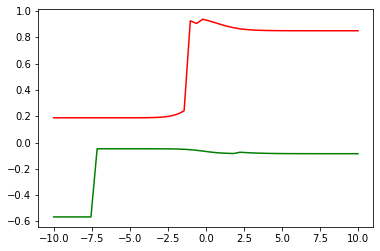

In [17]:
def draw_a_random_curve():
    i = random.choice(range(len(sub_x)))
    linear_output = np.concatenate((random_linear(sub_x[:i]), random_linear(sub_x[i:])))
    i2 = random.choice(range(len(linear_output)))
    output = np.concatenate((random_linear(sigmoid(linear_output[:i2])), random_linear(sigmoid(linear_output[i2:]))))
    
    return output

def draw(index):
    fig.clear()
    plt.plot(sub_x, draw_a_random_curve(), color='green')
    plt.plot(sub_x, draw_a_random_curve(), color='red')

fig = plt.gcf()
FuncAnimation(fig, draw, interval=500)

## 2.1 sigmoid
     

    可以看到sigmoid图像可以将整个实数范围的的任意值映射到[0,1]范围内，当输入值较大时,sigmoid将返回一个接近于1的值,而当输入值较小时,返回值将接近于0。sigmoid函数数学公式和函数图像，导数图像如下所示：

<img src="http://tianchi-media.oss-cn-beijing.aliyuncs.com/AIlearning/TensorFlow%E8%AF%BE%E7%A8%8B%E5%9B%BE%E7%89%87/%E7%9B%B8%E6%81%8B%E7%AF%87-Keras%E6%BF%80%E6%B4%BB%E5%87%BD%E6%95%B0/WechatIMG978.png"/>

sigmoid函数也叫Logistic函数,可以用来做二分类。在特征相差比较复杂或是相差不是特别大时效果比较好。Sigmoid作为激活函数有以下优缺点：

        优点：平滑、易于求导。
        缺点：激活函数计算量大，反向传播求误差梯度时，求导涉及除法；反向传播时，很容易就会出现梯度消失的情况，从而无法完成深层网络的训练。

Sigmoid 函数连续可导，相对于阶跃函数，可以直接利用梯度下降算法优 化网络参数，应用的非常广泛。

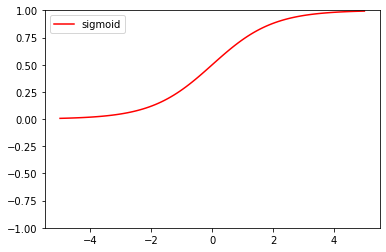

In [1]:
import tensorflow as tf
from tensorflow.keras import activations
import matplotlib.pyplot as plt
x = tf.linspace(-5., 5., 100)   # 构造一段连续的数据
x_ndarray = x.numpy()   # 转换为 ndarray 的类型
y_relu = activations.sigmoid(x)    # 使用 Relu 函数运算

plt.plot(x, y_relu, c='red', label='sigmoid')    # 画折线图
plt.ylim((-1, 1))  #y的范围
plt.legend(loc='best')
plt.show()

In [2]:
x = tf.linspace(-5.,5.,10)# 构造-6~6 的输入向量
x

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-5.        , -3.8888888 , -2.7777777 , -1.6666665 , -0.55555534,
        0.5555558 ,  1.666667  ,  2.7777781 ,  3.8888893 ,  5.        ],
      dtype=float32)>

In [3]:
y_relu = activations.sigmoid(x) 
y_relu   #可以看到输入x在一定的区间，输出在0-1之间。

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.00669286, 0.02005756, 0.05853692, 0.15886909, 0.36457652,
       0.6354236 , 0.841131  , 0.9414632 , 0.9799425 , 0.9933071 ],
      dtype=float32)>

In [4]:
#Numpy 演示，实现 Sigmoid 函数的导数:
import numpy as np # 导入numpy 
def sigmoid(x): # sigmoid函数
    return 1 / (1 + np.exp(-x))
def derivative(x): # sigmoid导数的计算 
    return sigmoid(x)*(1-sigmoid(x))

##  2.2 tanh
   

            Tanh是可以通过sigmoid平移等操作变化而来。但它的收敛速度要比sigmoid收敛的要快。其他的优缺点和sigmoid函数类似。它就是为了克服Sigmoid的不对原点对称的坏毛病。可惜的是它在两边还是有梯度饱和（也就是梯度趋近于0）的问题。
        它的函数形式为，图像和导数图像为：

<img src="http://tianchi-media.oss-cn-beijing.aliyuncs.com/AIlearning/TensorFlow%E8%AF%BE%E7%A8%8B%E5%9B%BE%E7%89%87/%E7%9B%B8%E6%81%8B%E7%AF%87-Keras%E6%BF%80%E6%B4%BB%E5%87%BD%E6%95%B0/WechatIMG979.png"/>

用代码可以画出tanh函数的图像。

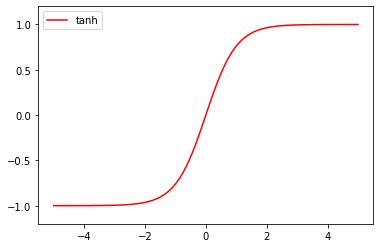

In [12]:
x = tf.linspace(-5., 5., 100)   # 构造一段连续的数据
x_ndarray = x.numpy()   # 转换为 ndarray 的类型
y = activations.tanh(x)    

plt.plot(x, y, c='red', label='tanh')    # 画折线图
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')
plt.show()

In [8]:
x = tf.linspace(-5.,5.,10)# 构造-5~5 的输入向量
x

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-5.        , -3.8888888 , -2.7777777 , -1.6666665 , -0.55555534,
        0.5555558 ,  1.666667  ,  2.7777781 ,  3.8888893 ,  5.        ],
      dtype=float32)>

In [9]:
y= activations.tanh(x) 
y

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-0.99990916, -0.9991625 , -0.99229795, -0.9311096 , -0.5046722 ,
        0.5046726 ,  0.93110967,  0.99229795,  0.9991625 ,  0.99990916],
      dtype=float32)>

In [11]:
#在 Numpy 中,实现 Tanh 函数的导数如下:
def derivative(x): # tanh导数实现
    return 1-tanh(x)**2

## 2.3 relu
    

    Rectified Linear Unit(ReLU) 用于隐层神经元输出,输入信号 <0 时，输出都是0，>0 的情况下，输出等于输入,ReLU 的优缺点：
    优点：

    ⅰ. SGD算法的收敛速度比 sigmoid 和 tanh 快；（梯度不会饱和，解决了梯度消失问题）
    ⅱ.  计算复杂度低，不需要进行指数运算；
    ⅲ.  适合用于后向传播。而且仍是最常用的activation function，在搭建人工神经网络的时候推荐优先尝试！

    缺点:
    训练的时候很”脆弱”，因为当取负号的时候 ，它的导数为零，预示着后半段就没什么作用了。
下面是函数图和导数图，函数公式：

<img src="http://tianchi-media.oss-cn-beijing.aliyuncs.com/AIlearning/TensorFlow%E8%AF%BE%E7%A8%8B%E5%9B%BE%E7%89%87/%E7%9B%B8%E6%81%8B%E7%AF%87-Keras%E6%BF%80%E6%B4%BB%E5%87%BD%E6%95%B0/WechatIMG980.png"/>

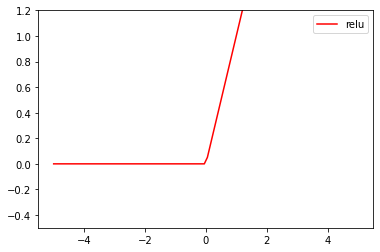

In [13]:
x = tf.linspace(-5., 5., 100)	# 构造一段连续的数据
x_ndarray = x.numpy()	# 转换为 ndarray 的类型
y_relu = activations.relu(x)    

plt.plot(x, y_relu, c='red', label='relu')    # 画折线图
plt.ylim((-0.5, 1.2))
plt.legend(loc='best')
plt.show()

In [14]:
#通过 Numpy，我们可以方便地实现 ReLU 函数的导数
def derivative(x): # ReLU函数的导数
    d = np.array(x, copy=True) # 用于保存梯度的张量 
    d[x < 0] = 0 # 元素为负的导数为0
    d[x >= 0] = 1 # 元素为正的元素导数为1 
    return d

## 2.4 elu

ELU也是为解决ReLU存在的问题而提出。Elu激活函数有优点：ReLU的基本所有优点、不会有Dead ReLU问题，输出的均值接近0、零中心点问题。Elu激活函数有缺点：计算量稍大，原点不可导。

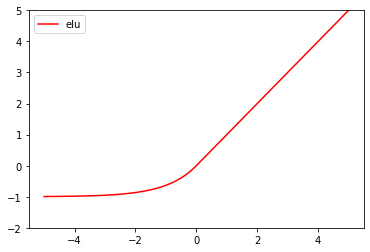

In [15]:
x = tf.linspace(-5., 5., 100)	# 构造一段连续的数据
x_ndarray = x.numpy()	# 转换为 ndarray 的类型
y_relu = activations.elu(x)    

plt.plot(x, y_relu, c='red', label='elu')    # 画折线图
plt.ylim((-2, 5))
plt.legend(loc='best')
plt.show()

## 2.5 selu

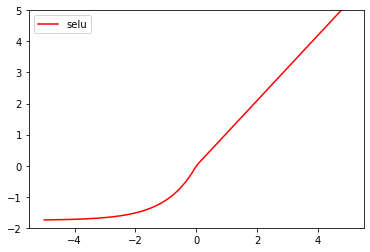

In [16]:
x = tf.linspace(-5., 5., 100)	# 构造一段连续的数据
x_ndarray = x.numpy()	# 转换为 ndarray 的类型
y_relu = activations.selu(x)    

plt.plot(x, y_relu, c='red', label='selu')    # 画折线图
plt.ylim((-2, 5))
plt.legend(loc='best')
plt.show()

## 2.6 gelu

Gelu激活函数的解析式

<img src="http://tianchi-media.oss-cn-beijing.aliyuncs.com/AIlearning/TensorFlow%E8%AF%BE%E7%A8%8B%E5%9B%BE%E7%89%87/%E7%9B%B8%E6%81%8B%E7%AF%87-Keras%E6%BF%80%E6%B4%BB%E5%87%BD%E6%95%B0/WechatIMG982.jpeg"/>

一般常在bert中使用的激活函数，作者经过实验证明比relu等要好。原点可导，不会有Dead ReLU问题。

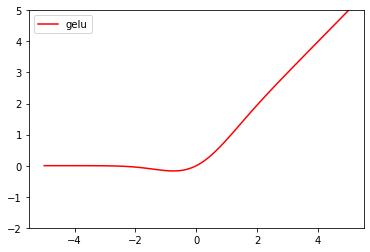

In [17]:
x = tf.linspace(-5., 5., 100)	# 构造一段连续的数据
x_ndarray = x.numpy()	# 转换为 ndarray 的类型
y_relu = activations.gelu(x)    
plt.plot(x, y_relu, c='red', label='gelu')    # 画折线图
plt.ylim((-2, 5))
plt.legend(loc='best')
plt.show()

## 2.6 swish

swish函数可以叫作自门控激活函数，它近期由谷歌的研究者发布，数学公式为：

<img src="http://tianchi-media.oss-cn-beijing.aliyuncs.com/AIlearning/TensorFlow%E8%AF%BE%E7%A8%8B%E5%9B%BE%E7%89%87/%E7%9B%B8%E6%81%8B%E7%AF%87-Keras%E6%BF%80%E6%B4%BB%E5%87%BD%E6%95%B0/WechatIMG983.png"/>

        Swish函数跟ReLu差不多，唯一区别较大的是接近于0的负半轴区域，因此，Swish 激活函数的输出可能下降，即使在输入值增大的情况下。大多数激活函数是单调的，即输入值增大的情况下，输出值不可能下降。而 Swish 函数为 0 时具备单侧有界（one-sided boundedness）的特性，它是平滑、非单调的。

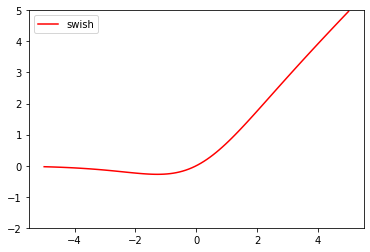

In [19]:
x = tf.linspace(-5., 5., 100)	# 构造一段连续的数据
x_ndarray = x.numpy()	# 转换为 ndarray 的类型
y_relu = activations.swish(x)    
plt.plot(x, y_relu, c='red', label='swish')    # 画折线图
plt.ylim((-2, 5))
plt.legend(loc='best')
plt.show()

## 三、怎么选择激活函数

具体问题具体看待

## 四、课后作业
     1 了解每个激活函数的具体场景，在跑代码时，可以注意一下激活函数的选择。